1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



[28.09 22.46 26.65 26.65 28.79 30.19 26.19 26.75 23.34 24.16 29.75 27.93
 26.68 23.85 32.97 25.79 26.37 25.28 26.73 23.2  26.76]
The maximum wind speed occurring every 50 years is 32.97989844019469 km/h.


Text(0, 0.5, 'Cumulative probability')

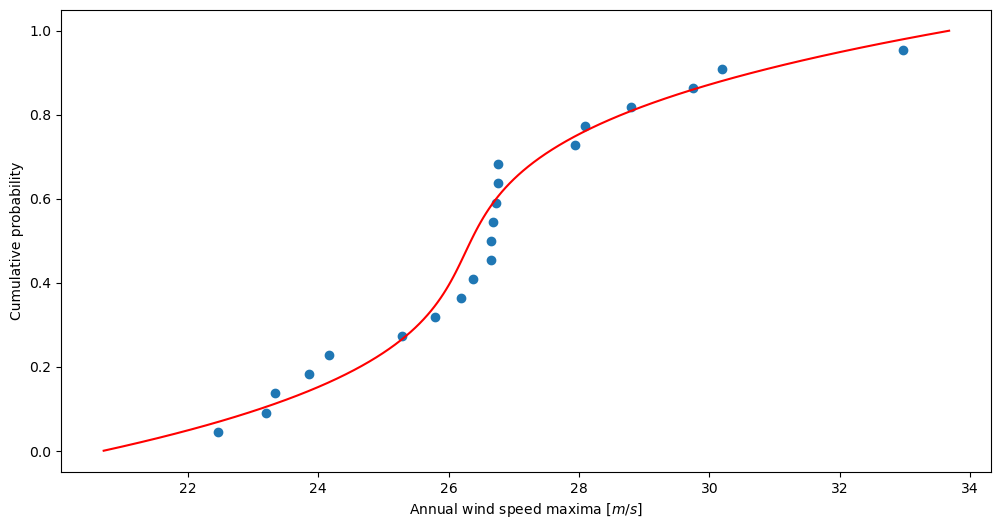

In [2]:
import numpy as np
max_speeds = np.load('max-speeds.npy')
print(max_speeds)

from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

years = len(max_speeds)
cprob = (np.arange(years)+1)/(years+ 1) ##p_i = i/(N+1)
sorted_max_speeds = np.sort(max_speeds)
speed_fit = UnivariateSpline(cprob, sorted_max_speeds) ##fits the data with a spline (polynomial) of degree up to 5
nprob = np.linspace(0, 1, 100)
fitted_max_speeds = speed_fit(nprob)

fifty_prob = 1. - 0.02
fifty_wind = speed_fit(fifty_prob)

print("The maximum wind speed occurring every 50 years is", fifty_wind,"km/h.")

fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(sorted_max_speeds, cprob)
ax.plot(fitted_max_speeds, nprob, 'r')
ax.set_xlabel('Annual wind speed maxima [$m/s$]')
ax.set_ylabel('Cumulative probability')

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

[ 52.64929255   6.16452592   3.90418183 -61.32093786]
[[ 1.96936545e+00 -8.73513063e-04  8.97808003e-02 -1.05130846e+00]
 [-8.73513063e-04  2.22850160e-03 -1.94649587e-04  1.09102873e-03]
 [ 8.97808003e-02 -1.94649587e-04  9.01600058e-02 -2.79203929e-01]
 [-1.05130846e+00  1.09102873e-03 -2.79203929e-01  1.41331328e+00]]
[23.09208516  5.73581625  5.26443372 15.77932183]
[[ 1.32862038e+00 -1.60402786e-03  4.65636992e-01 -1.08333895e+00]
 [-1.60402786e-03  6.31511897e-03 -9.73782676e-04  1.91624146e-03]
 [ 4.65636992e-01 -9.73782676e-04  5.79981102e-01 -7.84347822e-01]
 [-1.08333895e+00  1.91624146e-03 -7.84347822e-01  1.38425454e+00]]
The maximum max monthly temperature is reached at month  5.735816253872643 ± 0.0794677227909988
The maximum min monthly temperature is reached at month  6.164525924735823 ± 0.04720700798092778
So there's a non-zero offset, considering also the uncertanties, between the two maxima.


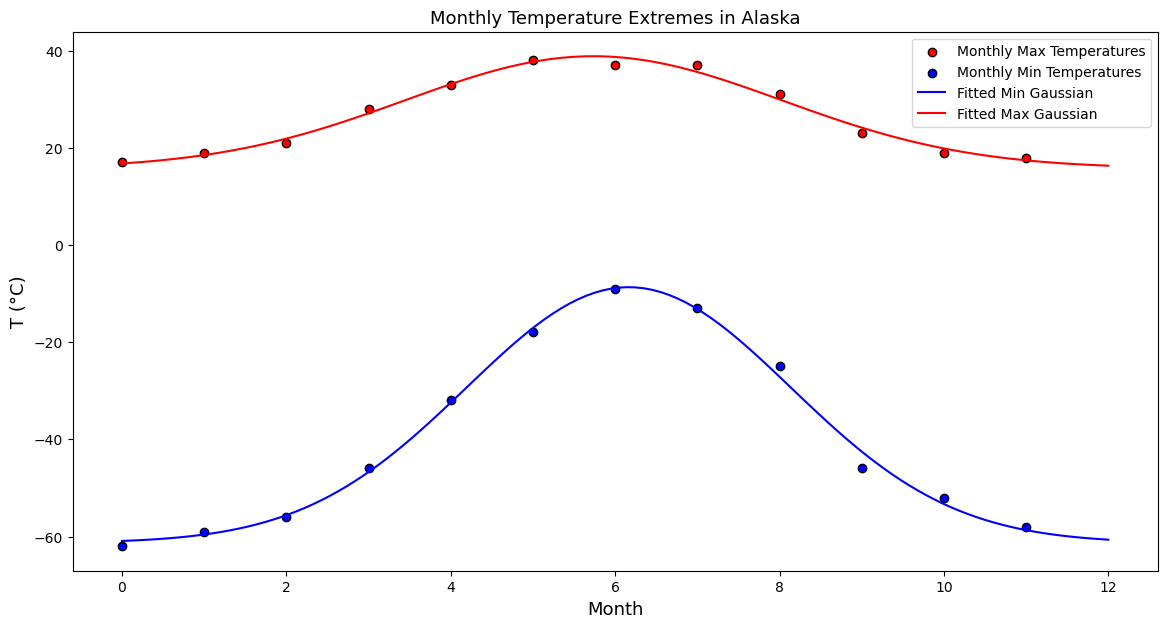

In [4]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(14, 7))

max= np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min= np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

ax.scatter(np.arange(12),max,color='r',edgecolor='black',label='Monthly Max Temperatures')
ax.scatter(np.arange(12),min,color='b',edgecolor='black',label='Monthly Min Temperatures')
ax.set_title('Monthly Temperature Extremes in Alaska',fontsize=13)
ax.set_xlabel('Month', fontsize= 13)
ax.set_ylabel('T (°C)',fontsize= 13)


from scipy import optimize

def gauss(x,A,mu,sigma,c):
    gauss= A*np.exp(-(x-mu)**2/(2*sigma))+c
    return gauss

params_min, params_covariance_min = optimize.curve_fit(gauss, np.arange(12),min, p0=[1,6,3,-60])
print(params_min)
print (params_covariance_min)

params_max, params_covariance_max = optimize.curve_fit(gauss, np.arange(12),max, p0=[1,6,3,15])
print(params_max)
print (params_covariance_max)

ax.plot(np.linspace(0,12,120), gauss(np.linspace(0,12,120), params_min[0], params_min[1],params_min[2],params_min[3]),label='Fitted Min Gaussian', color='b')
ax.plot(np.linspace(0,12,120), gauss(np.linspace(0,12,120), params_max[0], params_max[1],params_max[2],params_max[3]),label='Fitted Max Gaussian', color='r')
ax.legend(loc="best")
print("The maximum max monthly temperature is reached at month ",params_max[1],'±',np.sqrt(params_covariance_max[1,1]))
print("The maximum min monthly temperature is reached at month ",params_min[1],'±',np.sqrt(params_covariance_min[1,1]))
print("So there's a non-zero offset, considering also the uncertanties, between the two maxima.")

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


Local minimum 1 at [ 0.08984189 -0.7126564 ] with f= -1.0316284534898144
Local minimum 2 at [-0.08984189  0.71265638] with f= -1.0316284534898126
Minimum 1 and 2 are both global minima of f, and f_min= -1.0316284534898126


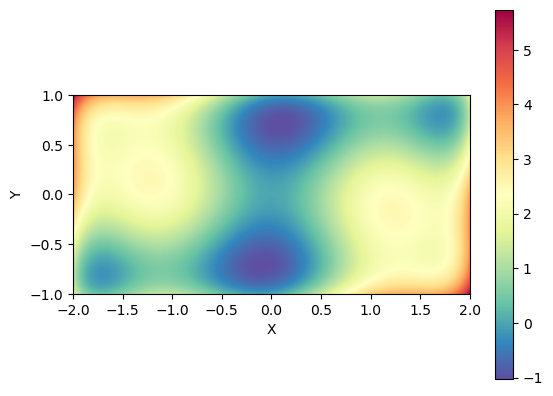

In [6]:
def f(v):
    return( (4-2.1*v[0]**2+v[0]**4/3.)*v[0]**2 +v[0]*v[1] + (4*v[1]**2-4)*v[1]**2 ) # scipy.optimize.minimize accepts only functions with 1 parameter

x = np.linspace(-2, 2, 1001)
y = np.linspace(-1, 1, 1001)

xx,yy = np.meshgrid(x, y)
#xx is a 2D matrix: contains copies of the 1D array x stacked vertically...it's a 1001x1001 matrix with the x coord of a grid 
#yy contains copies of the 1D array y stacked horizontally
zz = f( (xx,yy) )

from matplotlib import pyplot as plt

plt.imshow(zz, extent=[-2, 2, -1, 1], cmap='Spectral_r') ##extent to specify x,y limits
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')

import scipy.optimize 
min_1= scipy.optimize.minimize(f,x0=(0,-.75), bounds=((-0.5,0.5),(-1,-0.3)))
print('Local minimum 1 at', min_1.x, "with f=",f(min_1.x))

min_2= scipy.optimize.minimize(f,x0=(0,.75), bounds=((-0.5,0.6),(0.2,2)) )
print('Local minimum 2 at', min_2.x, "with f=",f(min_2.x))

#min_3= scipy.optimize.minimize(f,(-1.8,-0.8), bounds=((-2,-1.5),(-1,-0.5)))
#print('Local minimum 3 at', min_3.x, "with f=",f(min_3.x))

#min_4= scipy.optimize.minimize(f,(1.8,0.8), bounds=((1.5,2),(0.5,1)))
#print('Local minimum 4 at', min_4.x, "with f=",f(min_4.x))

print('Minimum 1 and 2 are both global minima of f, and f_min=', f(min_2.x))

4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

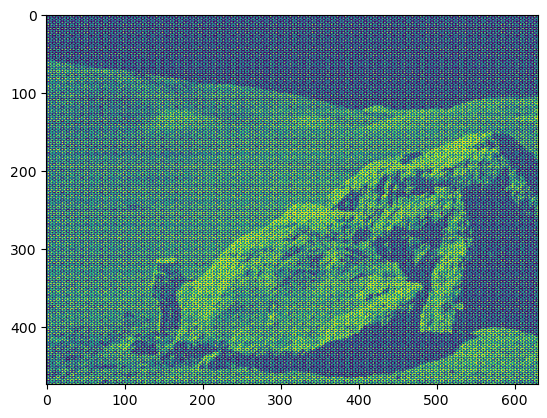

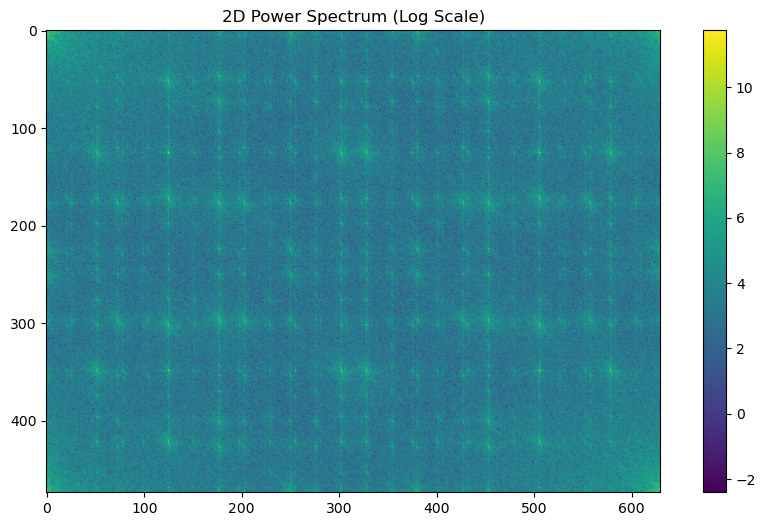

In [91]:
from scipy import fftpack

image = plt.imread("moonlanding.png")
plt.imshow(image)# for grayscale images the output is a 2D array with shape (height, width)
# with values being the normalized intensity of each pixel in [0.0, 1.0]

fft_image = fftpack.fft2(image) ## 2-D FFT: it outputs the 2-D spatial frequency spectrum of the image 
power = np.abs(fft_image) # the module is the amplitude of each frequency 

fig, ax = plt.subplots(figsize=(11, 6))
p=ax.imshow(np.log(power))  # use log scale to make the graph readable
ax.set_title("2D Power Spectrum (Log Scale)")
plt.colorbar(p)


/tmp/ipykernel_155/2916985722.py:7: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(filt_power))


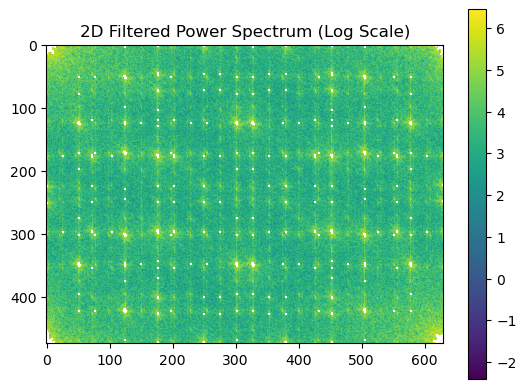

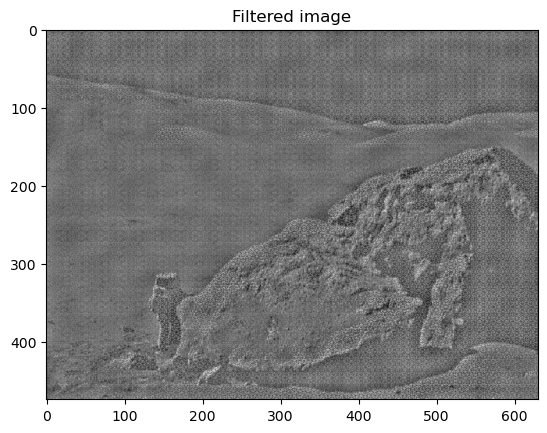

In [105]:
#Remove the high frequency noise by setting all values above a certain value to zero
threshold = 0.01
fft_image[power> (threshold * np.max(power))] = 0 # frequencies above 1% of maximum are removed
filt_power = np.abs(fft_image)

# plot of new power spectrum
plt.imshow(np.log(filt_power))
plt.title('2D Filtered Power Spectrum (Log Scale)')
plt.colorbar()
plt.show()

#Inverse fourier transform
filt_image = fftpack.ifft2(fft_image).real   

#Plot of filtered image
plt.imshow(filt_image, cmap = 'gray')
plt.title('Filtered image')
plt.show()